# Домашняя работа №1

# Задача №1

    Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры  t0= 300, 350, 400, 450, 500 градусов Цельсия,  Pk= 5 kPa. Принять давление за последней ступенью паровой турбины  P2=Pk . Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [9]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional, Tuple, List, Union

In [10]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [11]:
## Начальные параметры:
p0 = [5, 10, 15, 20] 
t0 = [300, 350, 400, 450, 500]
t0 = map(to_kelvin,t0)   
pk = 5 * kPa
t0 = list(t0)

In [17]:
def calculation_efficiency(p_0,t_0,p_k):
    p_0 = p_0 * MPa
    point_0 = gas(P=p_0 * unit, T=t_0)
    point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
    point_pump_outlet = gas(P=p_k * unit, x=0)
    useful_energy = point_0.h - point_condenser_inlet.h
    full_energy = point_0.h - point_pump_outlet.h
    efficiency = round(useful_energy/full_energy*100,3)
    return efficiency

In [18]:
efficiency = dict()
for t0value in t0:
    efficiency[t0value]= []
    for p0value in p0:
        efficiency[t0value].append(calculation_efficiency(p0value,t0value,pk))
efficiency

{573.15: [37.05, 29.618, 29.856, 30.106],
 623.15: [37.624, 39.925, 40.51, 34.002],
 673.15: [38.253, 40.672, 41.708, 42.015],
 723.15: [38.93, 41.393, 42.576, 43.188],
 773.15: [39.648, 42.118, 43.37, 44.106]}

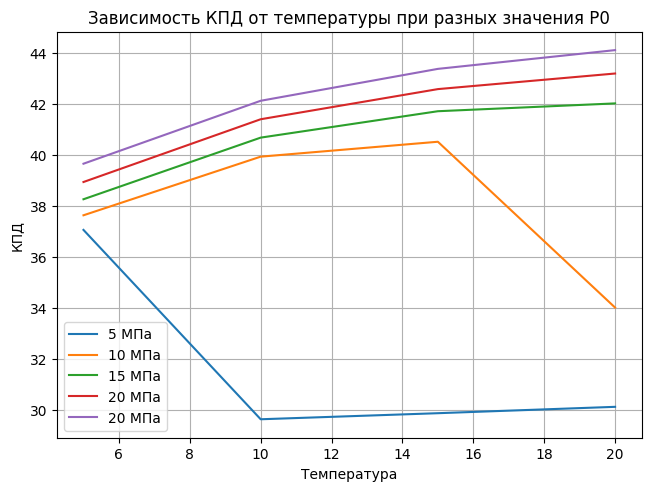

In [19]:
x = p0

plt.figure(layout = 'constrained')
plt.plot(x, efficiency[573.15], label = '5 МПа')  
plt.plot(x, efficiency[623.15], label = '10 МПа')  
plt.plot(x, efficiency[673.15], label = '15 МПа')
plt.plot(x, efficiency[723.15], label = '20 МПа')
plt.plot(x, efficiency[773.15], label = '20 МПа')

plt.xlabel('Температура')
plt.ylabel('КПД')
plt.title("Зависимость КПД от температуры при разных значения P0")
plt.legend();
plt.grid()